# Análise de correlação

-----------------------------

In [1]:
## IMPORTS
%matplotlib inline

import easygui
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing

warnings.filterwarnings('ignore') 

---------------------------

In [2]:
## Load dataset
dataframe = pd.read_csv("abalone_with_distnormal_columns.csv")

Gerar dataset com colunas seguindo distribuição normal...<br>
ferramenta: https://www.socscistatistics.com/utilities/normaldistribution/default.aspx

In [3]:
# Verificação de tipos e nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               4177 non-null   object 
 1   Sex2              4177 non-null   object 
 2   Length            4177 non-null   float64
 3   Diameter          4177 non-null   float64
 4   Height            4177 non-null   float64
 5   Whole weight      4177 non-null   float64
 6   Shucked weight    4177 non-null   float64
 7   Viscera weight    4177 non-null   float64
 8   Shell weight      4177 non-null   float64
 9   generate_column1  4177 non-null   float64
 10  generate_column2  4177 non-null   float64
 11  generate_column3  4177 non-null   float64
 12  generate_column4  4177 non-null   float64
 13  Rings             4177 non-null   int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 457.0+ KB


------------------------------------

In [4]:
# Iremos trabalhar com as colunas de dados que apresentarem os tipos int64 e float64
# Demais tipos de dados ficarão para trabalhos futuros
dataset = dataframe
for col in dataset.columns:
    if dataset[col].dtypes == 'float64' or dataset[col].dtypes == 'int64' :
        print("Column {} userfull".format(col))
    else:
        print("Column {} is not userfull".format(col))
        dataset = dataset.drop( columns = [col])

Column Sex is not userfull
Column Sex2 is not userfull
Column Length userfull
Column Diameter userfull
Column Height userfull
Column Whole weight userfull
Column Shucked weight userfull
Column Viscera weight userfull
Column Shell weight userfull
Column generate_column1 userfull
Column generate_column2 userfull
Column generate_column3 userfull
Column generate_column4 userfull
Column Rings userfull


---------------------------------------------------------

### Divisão treino e test

In [5]:
df_columns = list(dataset.columns)

In [6]:
Y_choiced = easygui.buttonbox("Qual coluna será seu Y ? Dica: Em alguns dataset's a coluna rotulada é a última muitas vezes.",title = "Escolher-Y", choices = df_columns )
easygui.msgbox ("Você escolheu coluna: " + Y_choiced)

'OK'

In [7]:
dataset = dataset.drop(columns = [Y_choiced])
labels = dataframe[[Y_choiced]]

-------------------

### Normalização

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

In [9]:
scaler = MinMaxScaler()

In [10]:
x_columns = list(dataset.columns)
dataset[x_columns] = scaler.fit_transform(dataset[x_columns])

In [11]:
dataset.head(20)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,generate_column1,generate_column2,generate_column3,generate_column4
0,0.558223,0.583940,0.184466,0.193448,0.000149,0.175651,0.000148,0.408673,0.678100,0.393939,0.462536
1,0.000295,0.423917,0.000175,0.000081,0.000065,0.000083,0.000068,0.586071,0.526385,0.271284,0.380403
2,0.000515,0.000528,0.262136,0.254796,0.000171,0.000245,0.000207,0.584757,0.463061,0.193362,0.422190
3,0.000405,0.583940,0.242718,0.194201,0.000143,0.198260,0.154228,0.620237,0.585752,0.448773,0.710375
4,0.000270,0.407915,0.000155,0.077151,0.000058,0.000068,0.054725,0.675427,0.837731,0.481962,0.234870
5,0.521408,0.000336,0.184466,0.000128,0.094757,0.000134,0.000118,0.458607,0.501319,0.362193,0.311239
6,0.000515,0.663952,0.000291,0.000289,0.159273,0.000245,0.000327,0.369251,0.748021,0.549784,0.423631
7,0.668667,0.679954,0.242718,0.289045,0.197579,0.000259,0.000257,0.562418,0.600264,0.551227,0.304035
8,0.582766,0.000448,0.242718,0.000188,0.000144,0.000195,0.164178,0.417871,0.440633,0.290043,0.213256
9,0.000540,0.000560,0.000291,0.000333,0.000210,0.262608,0.000317,0.739816,0.488127,0.546898,0.338617


----------------------------------------------------

### Classificar coluna: segue uma dist.normal ou não segue uma dist.normal

In [12]:
import scipy.stats as st
def shapiro_test(data):
    D,p = st.shapiro(data)
    alpha = 0.05
    if p > alpha:
        binario = 0
    else:
        binario = 1
        
    return binario

In [13]:
column = []
for col in dataset.columns:
    column.append(shapiro_test(dataset[col]))

In [14]:
column

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [15]:
names = list(dataset.columns)
drop_col = []

for i in range(len(column)):
    if column[i] == 1:
        drop_col.append(names[i])


print(drop_col)

dataset_only_normal = dataset.drop( columns = drop_col) 

['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [16]:
dataset_only_normal.head()

,generate_column1,generate_column2,generate_column3,generate_column4
0,0.408673,0.678100,0.393939,0.462536
1,0.586071,0.526385,0.271284,0.380403
2,0.584757,0.463061,0.193362,0.422190
3,0.620237,0.585752,0.448773,0.710375
4,0.675427,0.837731,0.481962,0.234870


### Pearson

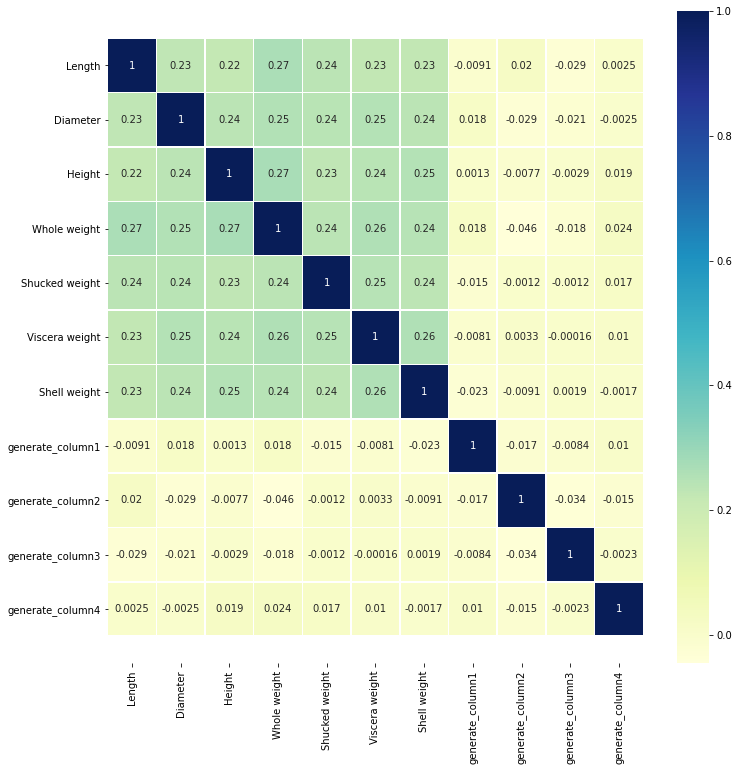

In [17]:
if len(dataset_only_normal.columns) < 2:
    print("Número insuficiente de colunas")
else:
    fig, ax = plt.subplots(figsize=(12,12))
    map2 = sns.heatmap(dataset.corr(method = "spearman"), annot = True, ax = ax, linewidth=0.5, cmap='YlGnBu')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    figure2 = map2.get_figure()
    figure2.savefig("spearman.png")

### Spearman

In [20]:
# http://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf
dataset.corr(method = 'spearman')

,Sex,Sex2,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,generate_column1,generate_column2,generate_column3,generate_column4
Sex,1.000000,1.000000,-0.016698,-0.012475,-0.009151,0.004705,-0.001950,-0.016750,0.026361,0.032345,0.014809,0.015917,-0.019453
Sex2,1.000000,1.000000,-0.016698,-0.012475,-0.009151,0.004705,-0.001950,-0.016750,0.026361,0.032345,0.014809,0.015917,-0.019453
Length,-0.016698,-0.016698,1.000000,0.229429,0.220097,0.267760,0.235883,0.226815,0.227021,-0.009112,0.020011,-0.028947,0.002465
Diameter,-0.012475,-0.012475,0.229429,1.000000,0.236328,0.252461,0.241745,0.251387,0.238035,0.018227,-0.028801,-0.021477,-0.002451
Height,-0.009151,-0.009151,0.220097,0.236328,1.000000,0.270738,0.230757,0.240318,0.250598,0.001270,-0.007655,-0.002889,0.019165
Whole weight,0.004705,0.004705,0.267760,0.252461,0.270738,1.000000,0.236815,0.256603,0.244233,0.018109,-0.046238,-0.017905,0.024156
Shucked weight,-0.001950,-0.001950,0.235883,0.241745,0.230757,0.236815,1.000000,0.247555,0.235350,-0.015238,-0.001179,-0.001209,0.016787
Viscera weight,-0.016750,-0.016750,0.226815,0.251387,0.240318,0.256603,0.247555,1.000000,0.257963,-0.008066,0.003347,-0.000157,0.010207
Shell weight,0.026361,0.026361,0.227021,0.238035,0.250598,0.244233,0.235350,0.257963,1.000000,-0.023150,-0.009076,0.001906,-0.001726
generate_column1,0.032345,0.032345,-0.009112,0.018227,0.001270,0.018109,-0.015238,-0.008066,-0.023150,1.000000,-0.017238,-0.008392,0.010213


-----------------------

In [21]:
data_nom = dataframe[categorical_columns]

In [22]:
len(data_nom.columns)

2

### Kendall Tau 

In [23]:
if int((len(data_nom.columns))) < 2:
    print("Número insuficiente de colunas")
else:
    print(data_nom.corr(method = "kendall"))

      Sex  Sex2
Sex   1.0   1.0
Sex2  1.0   1.0


### Kappa 

Exemplos de casos de uso do kappa cohen: https://www.programcreek.com/python/example/89250/sklearn.metrics.cohen_kappa_score<br>
Pelos exemplos visto é possível afirmar que os casos em que se utiliza é na classificação como métrica de acerta, o dado não pode ser continuo e é aconselhavel para 
quando se tem o real e o prédito.

In [24]:
if len(data_nom.columns) != 2:
    print("Número insuficiente de colunas")
else:
    for i in range(len(categorical_columns)):
        if i+1 < int(len(categorical_columns)):
            kappa = cohen_kappa_score(data_nom[categorical_columns[i]], data_nom[categorical_columns[i+1]])
            print("Kappa coeficiente: {}  for {} and {}".format(kappa, categorical_columns[i], categorical_columns[i+1]))
        else:
            break
        
        

Kappa coeficiente: 1.0  for Sex and Sex2


------------------------------

### Visualizações

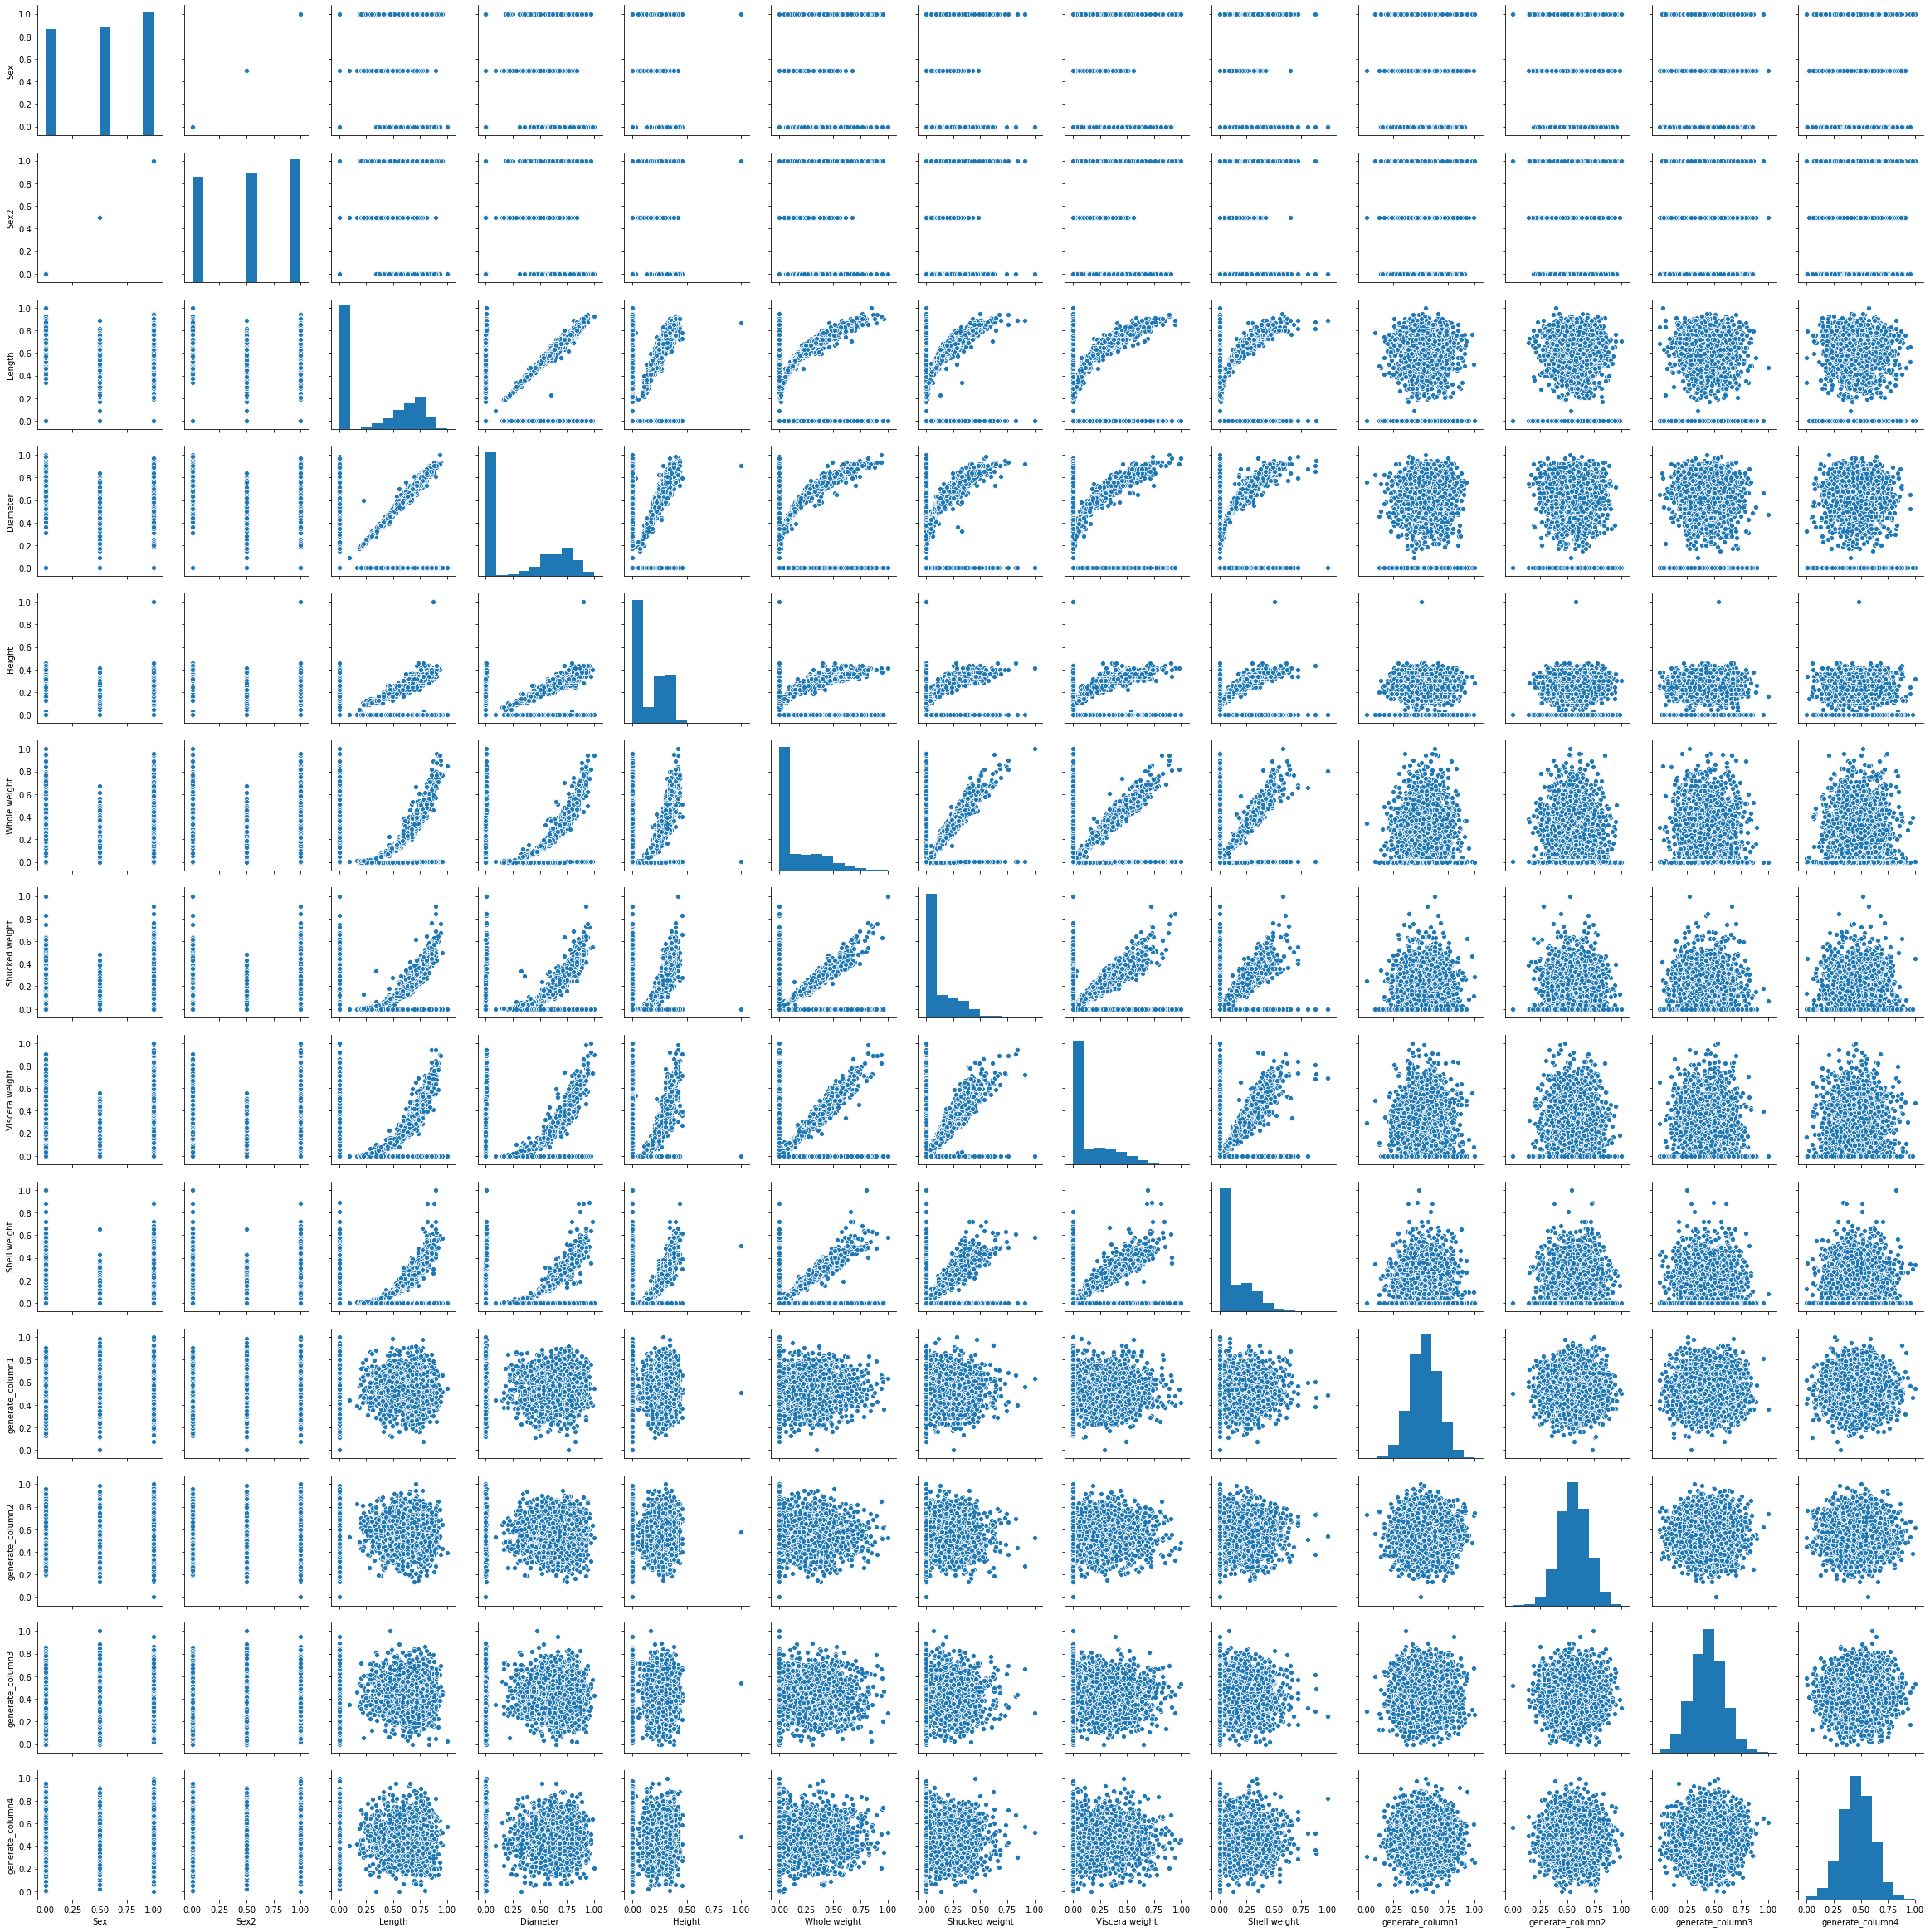

In [25]:
# Not working anymore
sns.pairplot(dataset)
plt.show(sns)

### Pearson
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html

(4.0, 0.0)

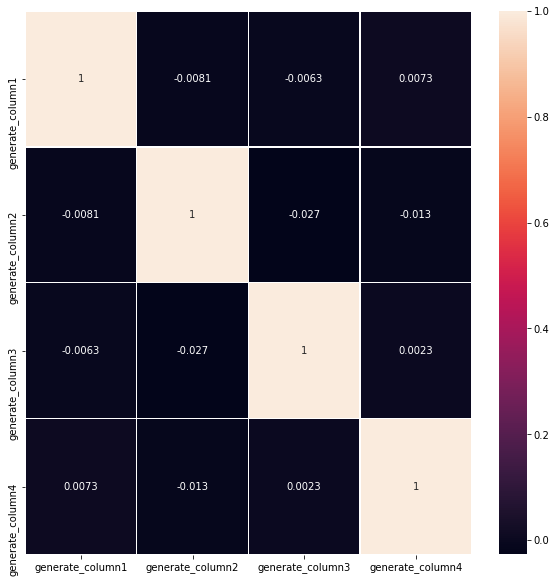

In [29]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset_only_normal.corr(method = "pearson"), annot = True, ax = ax, linewidth=0.5)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Spearman
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

(13.0, 0.0)

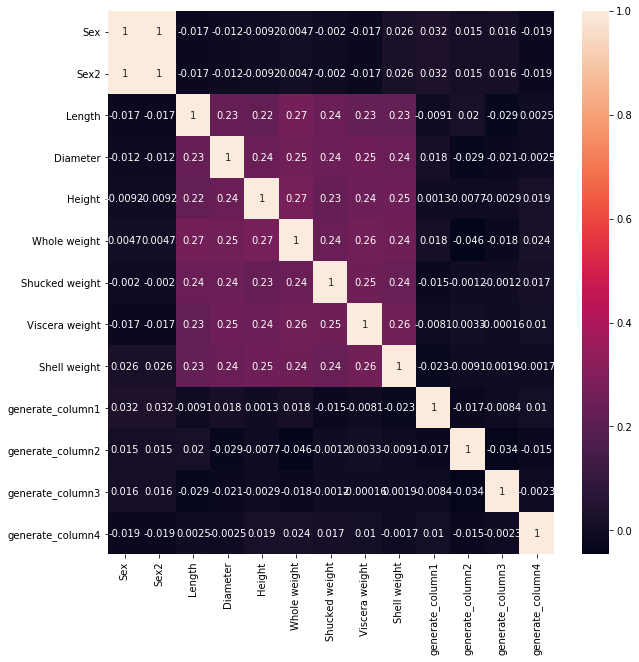

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(method = "spearman"), annot = True, ax = ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

------------------------------

### Lista para olhar depois

Point biserial para variáveis discretas com variáveis contínuas.
       https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html#scipy.stats.pointbiserialr

(14.0, 0.0)

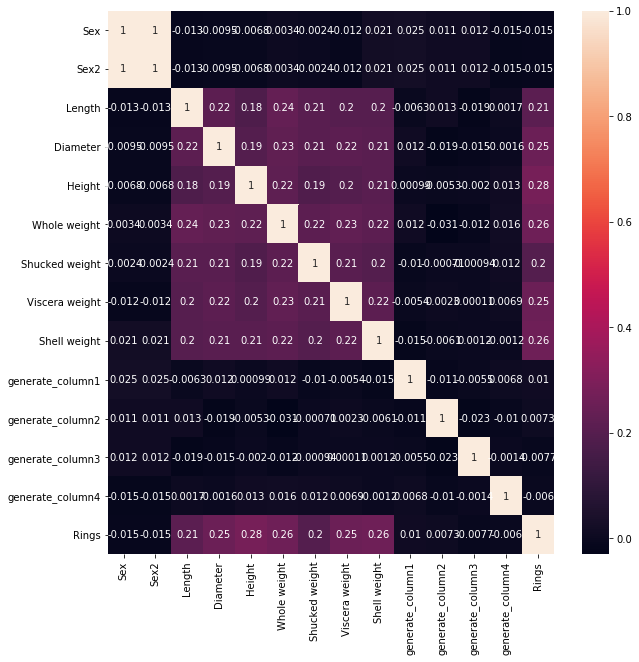

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataframe.corr(method = "kendall"), annot = True, ax = ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Linregress: isso calcula uma regressão de mínimos quadrados para dois conjuntos de medidas.
    https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress